<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/OLAP_and_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

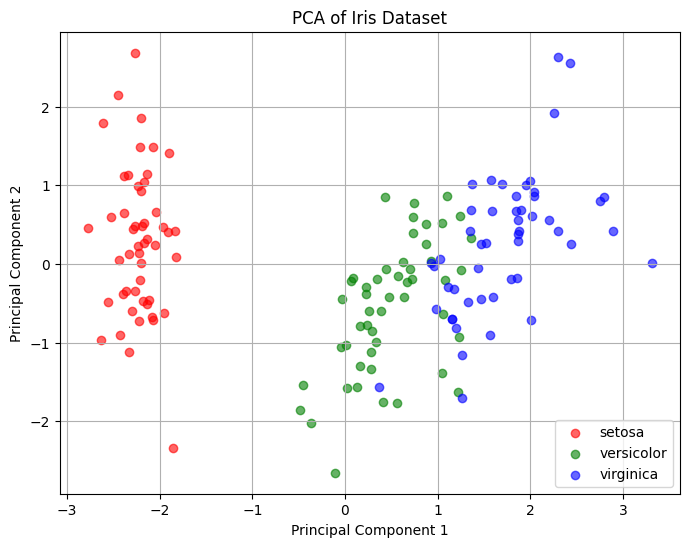

Explained variance ratio by each component: [0.72962445 0.22850762]


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = iris.target  # Target: Species (0,1,2)
target_names = iris.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Species'] = y

# Plot the PCA results
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for target, color, name in zip([0,1,2], colors, target_names):
    plt.scatter(df_pca[df_pca['Species'] == target]['PC1'],
                df_pca[df_pca['Species'] == target]['PC2'],
                c=color, label=name, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Explained variance
print("Explained variance ratio by each component:", pca.explained_variance_ratio_)
